In [1]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from collections import defaultdict

In [6]:
# Get price data from Quandl
quandl.ApiConfig.api_key ="ynsBrunZDToWt4x4ygKH"
bitcoin = quandl.get("BCHAIN/MKPRU")
bitcoin = bitcoin.shift(-1) # data set has daily open, we want daily close
bitcoin = bitcoin.loc['2011-01-01':] # Remove the 0's
bitcoin.columns = ['Last']
bitcoin

,Last
Date,
2011-01-01,0.299996
2011-01-02,0.299998
2011-01-03,0.299899
2011-01-04,0.298998
2011-01-05,0.299000
...,...
2020-04-27,7699.270000
2020-04-28,7790.660000
2020-04-29,7765.330000


In [4]:
bitcoin['RollingRet'] = (bitcoin['Last'].shift(-365) / bitcoin['Last'] - 1) * 100

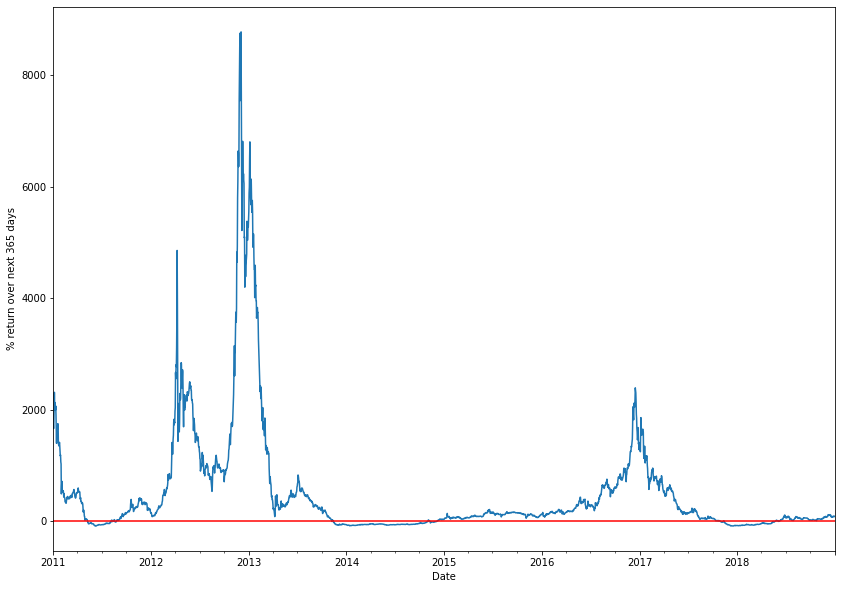

In [5]:
ax = bitcoin.loc['2011':'2018','RollingRet'].plot(figsize=(14,10))
ax.set_ylabel("% return over next 365 days")
plt.axhline(y=0, color='r', linestyle='-');

In [7]:
# Count days each year where return over next 365 days would have been negative  
neg_return = bitcoin[bitcoin['RollingRet'] < 0 ]
neg_return['Last'].groupby(neg_return.index.year).count().to_frame().rename(columns={'Last':'Count'})

KeyError: 'RollingRet'

In [9]:
# Get start and end dates and see what was happening with price at those times

print (neg_return['2011'].index[0], neg_return.loc['2011','Last'].iloc[0])
print (neg_return['2011'].index[-1], neg_return.loc['2011','Last'].iloc[-1])

print (neg_return['2013'].index[0], neg_return.loc['2013','Last'].iloc[0])
print (neg_return['2014'].index[-1], neg_return.loc['2014','Last'].iloc[-1])

print (neg_return['2017'].index[0], neg_return.loc['2013','Last'].iloc[0])

NameError: name 'neg_return' is not defined

NameError: name 'neg_return' is not defined

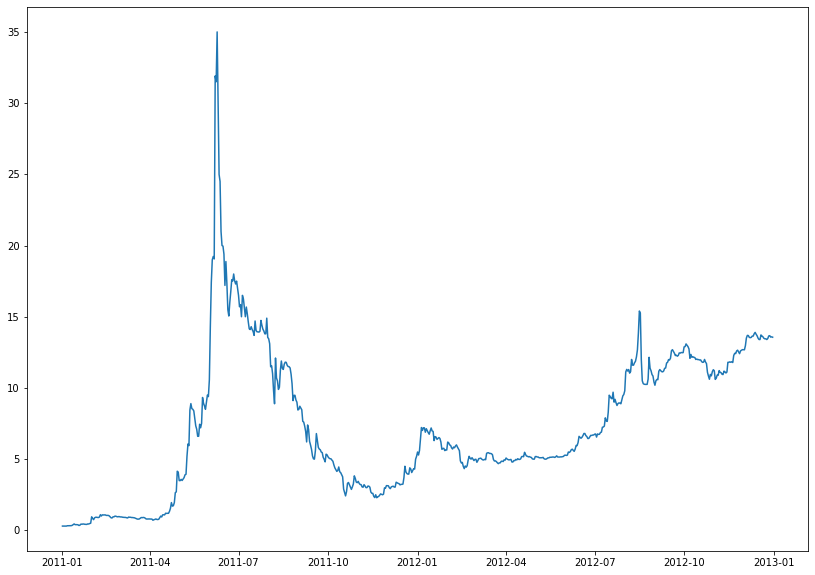

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2011':'2012','Last'].index, bitcoin.loc['2011':'2012','Last'])       
#ax.plot([neg_return['2011'].index[0],neg_return['2011'].index[-1]], [neg_return.loc['2011','Last'].iloc[0],neg_return.loc['2011','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2011'].index[0]:neg_return['2011'].index[-1]].index, bitcoin.loc[neg_return['2011'].index[0]:neg_return['2011'].index[-1],'Last'], color='#CB4335'); 

NameError: name 'neg_return' is not defined

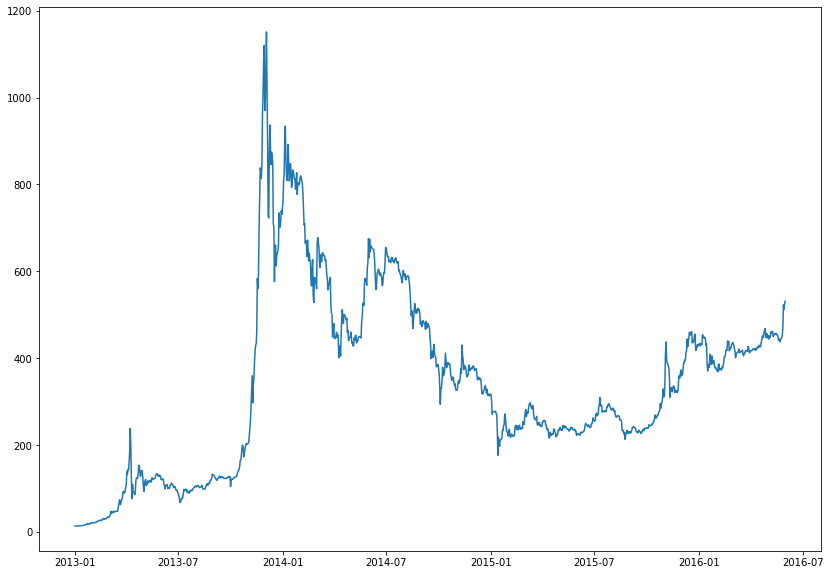

In [11]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2013':'2016-05','Last'].index, bitcoin.loc['2013':'2016-05','Last'])       
#ax.plot([neg_return['2013'].index[0],neg_return['2014'].index[-1]], [neg_return.loc['2013','Last'].iloc[0],neg_return.loc['2014','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2013'].index[0]:neg_return['2014'].index[-1]].index, bitcoin.loc[neg_return['2013'].index[0]:neg_return['2014'].index[-1],'Last'], color='#CB4335');  

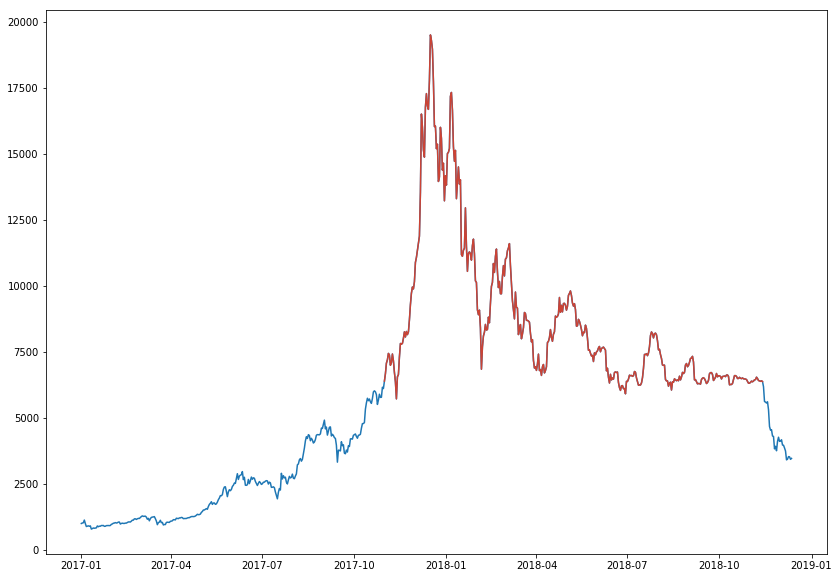

In [102]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(bitcoin.loc['2017':'2018','Last'].index, bitcoin.loc['2017':'2018','Last'])       
#ax.plot([neg_return['2013'].index[0],neg_return['2014'].index[-1]], [neg_return.loc['2013','Last'].iloc[0],neg_return.loc['2014','Last'].iloc[-1]], 'x', color='Red', markersize=8)
ax.plot(bitcoin.loc[neg_return['2017'].index[0]:'2018-11-13'].index, bitcoin.loc[neg_return['2017'].index[0]:'2018-11-13','Last'], color='#CB4335'); 